<a href="https://colab.research.google.com/github/dhruvi013/Annual-Rain-Prediction-for-States/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
# Load dataset
file_path = '/content/Monthly_Rainfall_From_1901_to_2017.csv'  # Update with the actual file path
rain_df = pd.read_csv(file_path)

In [ ]:
# Preprocess data
rain_df['YEAR'] = pd.to_datetime(rain_df['YEAR'], format='%Y')  # Ensure 'Year' column is in datetime format
rain_df = rain_df.set_index('YEAR')  # Set 'Year' as index

In [ ]:
# Aggregate rainfall for selected months (Jan, Feb, Mar)
season_data = rain_df[['JAN', 'FEB', 'MAR']].sum(axis=1)

In [ ]:
# Split data into training (1901-2010) and testing (2011-2017)
train_data = season_data[season_data.index.year <= 2010]
test_data = season_data[season_data.index.year > 2010]

In [ ]:
# Scale data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

In [ ]:
# Prepare LSTM input data
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 3  # Use 3 years to predict the next
X_train, y_train = create_dataset(train_scaled, time_steps)
X_test, y_test = create_dataset(test_scaled, time_steps)

In [ ]:
# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0083
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0044
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0039
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0039
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0042
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0046
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0039
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0041
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0041
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0041
Epoch 13/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040
Epoch 14/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040
Epoch 15/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - lo

In [ ]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Print predicted and actual values for the years 2011-2017
print("Year\tActual\t\tPredicted")
for i, year in enumerate(season_data.index.year[-len(test_predictions):]):
    actual = y_test_actual[i][0]
    predicted = test_predictions[i][0]
    print(f"{year}\t{actual:.2f}\t\t{predicted:.2f}")

Year	Actual		Predicted
2002	50.50		234.57
2003	137.50		114.73
2004	93.20		91.95
2005	267.30		88.41
2006	265.80		139.82
2007	227.80		191.30
2008	174.10		221.85
2009	201.20		193.67
2010	175.80		173.05
2011	231.00		164.26
2012	316.20		175.62
2013	131.50		211.13
2014	50.90		206.11
2015	54.70		133.41
2016	59.60		65.14
2017	66.40		48.68
1901	98.90		53.40
1902	156.20		66.35
1903	67.60		95.83
1904	55.00		100.02
1905	25.60		77.14
1906	47.60		43.05
1907	50.20		35.41
1908	99.60		36.97
1909	138.00		57.55
1910	99.60		87.05
1911	74.70		102.69
1912	58.70		90.64
1913	64.50		67.75
1914	95.50		57.45
1915	126.70		64.47
1916	92.70		86.04
1917	45.70		95.62
1918	60.40		77.08
1919	17.30		55.76
1920	63.00		37.17
1921	37.70		38.05
1922	62.50		36.87
1923	36.60		46.18
1924	24.80		41.58
1925	55.30		34.72
1926	13.20		32.76
1927	42.70		28.78
1928	28.90		29.41
1929	34.10		25.79
1930	31.50		29.67
1931	12.20		27.38
1932	46.40		22.06
1933	20.60		24.21
1934	80.30		24.46
1935	36.40		40.77
1936	37.70		43.66
1937	9.70		42.

In [ ]:
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))

In [ ]:
print(f'\nTraining RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')


Training RMSE: 57.13575591293758
Testing RMSE: 59.357401957925426


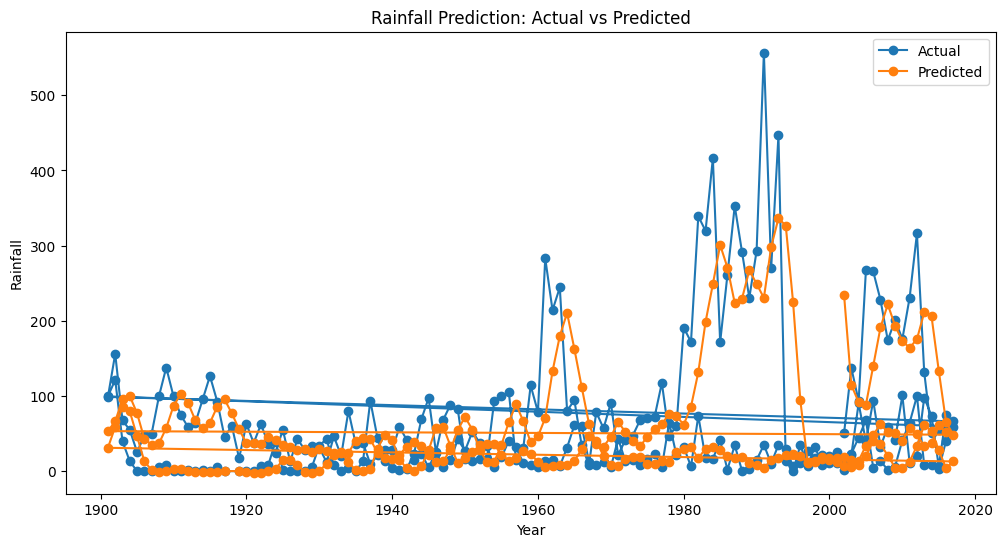

In [ ]:
# Plot actual vs predicted values for testing data
years_test = season_data.index.year[-len(test_predictions):]

plt.figure(figsize=(12, 6))
plt.plot(years_test, y_test_actual, label='Actual', marker='o')
plt.plot(years_test, test_predictions, label='Predicted', marker='o')
plt.title('Rainfall Prediction: Actual vs Predicted')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.legend()
plt.show()